In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
import random
import math

In [2]:
A,B = [],[]
for _ in range(50):
    r = random.random() * 50
    r = math.ceil(r)
    A.append(r)
for _ in range(50):
    r = random.random() * 50
    r = math.ceil(r)
    B.append(r)
print(A, B)

[1, 38, 23, 28, 26, 26, 16, 22, 11, 27, 2, 19, 25, 16, 2, 45, 38, 41, 4, 24, 43, 21, 40, 7, 47, 9, 9, 8, 50, 4, 43, 46, 13, 3, 22, 12, 39, 5, 25, 32, 14, 41, 46, 19, 48, 39, 10, 45, 12, 2] [4, 15, 41, 49, 35, 3, 21, 14, 18, 38, 4, 48, 7, 1, 46, 30, 16, 13, 35, 33, 6, 24, 46, 5, 48, 42, 43, 48, 32, 32, 16, 10, 22, 18, 43, 28, 41, 31, 15, 49, 39, 25, 19, 16, 14, 12, 28, 28, 30, 36]


In [3]:
n = len(A)

In [4]:
A,B=np.array(A),np.array(B)
for i in range(n):
  if A[i]>B[i]:
    A[i],B[i]=B[i],A[i]

In [5]:
A = A.reshape(n,1)
B = B.reshape(n,1)

In [6]:
x = np.concatenate((A, B), axis = 1)
y = A+B

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x ,y ,random_state=42)
print(type(x))

<class 'numpy.ndarray'>


In [8]:
datatype = torch.FloatTensor
Dx, Dy = 2, 1
x_train = Variable(torch.Tensor(X_train).type(datatype), requires_grad=False)
x_test=Variable(torch.Tensor(X_test).type(datatype), requires_grad=False)
y_train = Variable(torch.Tensor(y_train).type(datatype), requires_grad=False)
y_test = Variable(torch.Tensor(y_test).type(datatype), requires_grad=False)
w = Variable(torch.randn(Dx, Dy).type(datatype), requires_grad=True)

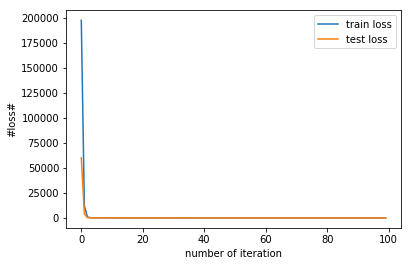

In [9]:
alpha = 0.00001
train_loss = []
test_loss = []
for t in range(100):
  y_pred_train = x_train.mm(w)
  y_pred_test = x_test.mm(w)
  loss_train = (y_pred_train - y_train).pow(2).sum()
  loss_test = (y_pred_test - y_test).pow(2).sum()
  train_loss.append(loss_train.data)
  test_loss.append(loss_test.data)
  loss_train.backward()
  w.data -= alpha * w.grad.data
  w.grad.data.zero_()
#print(w)
plt.plot(train_loss,label="train loss")
plt.plot(test_loss,label="test loss")
plt.xlabel("number of iteration")
plt.ylabel("#loss#")
plt.legend()

In [14]:
with torch.no_grad():
    def add_febo(a,b):
      x_predict = Variable(torch.Tensor([[a,b]]).type(datatype), requires_grad=False)
      return (round(float(x_predict.mm(w).data)))

    def fibonacci(a,b,n):
      if n == 1:
        return a
      result = add_febo(a,b)
      return fibonacci(b,result,n-1)

    a, b, n = 10, 15, 10
    for i in range(1,n+1):
      print(fibonacci(a,b,i))

10
15
25
40
65
105
170
275
445
720
